In [1]:
%pylab inline

import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.animation as animation
#from matplotlib.pyplot import *
import scipy as sp
from scipy import constants

import os
cwd = os.getcwd()
dir_name = os.path.join(cwd, 'session-2')
file_ext = '.png'
if not os.path.exists(dir_name):
    os.makedirs(dir_name)

figsize(4, 4)

def plotPlaneWaves2D(pw_params, rectangles=None, removeaxis=True):
    fig = None
    z_min, z_max = None, None
    xyz = []
    for i in range(len(pw_params)):
        xlim, ylim, E_kx_ky, Nx, Ny = pw_params[i]['xlim'], pw_params[i]['ylim'], \
            pw_params[i]['E_kx_ky'], pw_params[i]['Nx'], pw_params[i]['Ny']
        x = np.linspace(xlim[0], xlim[1], Nx)
        y = np.linspace(ylim[0], ylim[1], Ny)
        X, Y = np.meshgrid(x, y)

        Z = np.zeros(X.shape, dtype=complex)
        for j in range(len(E_kx_ky)):
            E, kx, ky = E_kx_ky[j]['E'], E_kx_ky[j]['kx'], E_kx_ky[j]['ky']
        
            Z += E*np.exp(-1j*(kx*X + ky*Y))
        Z = np.real(Z)
        
        z_min_i, z_max_i = Z.min(), Z.max()
        if z_min==None or z_min_i<z_min:
            z_min = z_min_i
        if z_max==None or z_max_i>z_max:
            z_max = z_max_i
        xyz.append([X, Y, Z])

    for i in range(len(xyz)):
        X, Y, Z = xyz[i]
        fig = plt.pcolormesh(X, Y, Z, cmap=cm.rainbow, vmin=z_min, vmax=z_max)
    if rectangles!=None:
        for i in range(len(rectangles)):
            x0, y0, x1, y1, color, fill = rectangles[i]['x0'], rectangles[i]['y0'], \
                rectangles[i]['x1'], rectangles[i]['y1'], rectangles[i]['color'], rectangles[i]['fill']
            width = x1 - x0
            height = y1 - y0
            plt.gca().add_patch(Rectangle([x0, y0], width, height, color=color, fill=fill))

    if removeaxis:
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    return fig


def animatePlaneWaves2D(pw_params, rectangles=None, N_phase=12,
                    file_name=None, fps=10, dpi=100):
    z_min, z_max = None, None
    xyz = []
    for i in range(len(pw_params)):
        xlim, ylim, E_kx_ky, Nx, Ny = pw_params[i]['xlim'], pw_params[i]['ylim'], \
            pw_params[i]['E_kx_ky'], pw_params[i]['Nx'], pw_params[i]['Ny']
        x = np.linspace(xlim[0], xlim[1], Nx)
        y = np.linspace(ylim[0], ylim[1], Ny)
        X, Y = np.meshgrid(x, y)

        Z = np.zeros(X.shape, dtype=complex)
        for j in range(len(E_kx_ky)):
            E, kx, ky = E_kx_ky[j]['E'], E_kx_ky[j]['kx'], E_kx_ky[j]['ky']
        
            Z += E*np.exp(-1j*(kx*X + ky*Y))
        Z = np.real(Z)

        z_min_i, z_max_i = Z.min(), Z.max()
        if z_min==None or z_min_i<z_min:
            z_min = z_min_i
        if z_max==None or z_max_i>z_max:
            z_max = z_max_i

        Z = np.zeros(X.shape, dtype=complex)
        for j in range(len(E_kx_ky)):
            E, kx, ky = E_kx_ky[j]['E'], E_kx_ky[j]['kx'], E_kx_ky[j]['ky']
        
            Z += E*np.exp(-1j*(kx*X + ky*Y))
        xyz.append([X, Y, Z])


    def animate_E(i):
        phi_i = float(i)*2.0*np.pi/N_phase
        for j in range(len(xyz)):
            X, Y, Z = xyz[j]
            Z = np.real(np.exp(1j*phi_i)*Z)
        
            fig = plt.pcolormesh(X, Y, Z, cmap=cm.rainbow, vmin=z_min, vmax=z_max)

        if rectangles!=None:
            for j in range(len(rectangles)):
                x0, y0, x1, y1, color, fill = rectangles[j]['x0'], rectangles[j]['y0'], \
                    rectangles[j]['x1'], rectangles[j]['y1'], rectangles[j]['color'], rectangles[j]['fill']
                width = x1 - x0
                height = y1 - y0
                plt.gca().add_patch(Rectangle([x0, y0], width, height, color=color, fill=fill))

            
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        return fig

    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_E, frames=N_phase, interval=1, repeat=True)
    #file_ext = '.gif'
    #file_name = os.path.join(dir_name, 'plane-wave-timeharmonic'+file_ext)
    if file_name!=None:
        anim.save(file_name+'.gif', writer="imagemagick", fps=fps, dpi=dpi)
    return anim


Populating the interactive namespace from numpy and matplotlib


### Plane wave infinite media

In [89]:

do_plane_wave_inf = False
if do_plane_wave_inf:
    n = 1.5-0.1j
    k0 = 2.0*np.pi*4.0
    k = k0*n
    theta = np.pi/6
    kx = np.real(k*np.sin(theta))
    ky = np.sqrt(k**2 - kx**2)
    if np.imag(ky)>0.0:
        ky *= -1.0

    pws = [{'xlim':[-1, 1], 'ylim':[-1, 1], 'E_kx_ky':[{'E':1.0, 'kx':kx, 'ky':ky}], 'Nx':400, 'Ny':400}]

    rectangles = None
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'plane-wave-timeharmonic'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'plane-wave-timeharmonic')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()


### Plane wave incident on planar boundary

In [80]:
figsize(4, 4)

def snell_angle(theta_1, n1, n2):
    theta_2 = np.arcsin(n1*np.sin(theta_1)/n2 + 0.0j)
    return theta_2

def RT_planar_spol(theta_1, n1, n2):
    theta_2 = snell_angle(theta_1, n1, n2)
    Z1 = 1/(n1*np.cos(theta_1))
    Z2 = 1/(n2*np.cos(theta_2))
    R = (Z2-Z1)/(Z2+Z1)
    T = 2.0*Z2/(Z2+Z1)
    return R, T

def RT_planar_ppol(theta_1, n1, n2):
    theta_2 = snell_angle(theta_1, n1, n2)
    Z1 = (1/n1)*np.cos(theta_1)
    Z2 = (1/n2)*np.cos(theta_2)
    R = (Z2-Z1)/(Z2+Z1)
    T = 2.0*Z2/(Z2+Z1)*(np.cos(theta_1)/np.cos(theta_2))
    return R, T


def Get_RT_arrows(theta_1, n1, n2, pol='s', Ei=1.0, plotem=False, head_width=0.1, 
                       head_length=0.2, colors=['k', 'b', 'r'], xylims=[(-1.0, 1.0), (-1.0, 1.0)]):
    theta_2 = snell_angle(theta_1, n1, n2)
    R, T = None, None
    if pol=='s':
        R, T = RT_planar_spol(theta_1, n1, n2)
    else:
        R, T = RT_planar_ppol(theta_1, n1, n2)
    evanescent = False
    if np.imag(theta_2)!=0.0:
        evanescent = True
    theta_2 = np.real(theta_2)
    hl = head_length
    arr_i = [-Ei*np.sin(theta_1), -Ei*np.cos(theta_1), -hl*np.sin(theta_1), -hl*np.cos(theta_1)]
    hl = head_length
    if hl>np.abs(R):
        hl = 0.95*np.abs(R)
    arr_r = [0.0, 0.0, -(np.abs(R)*Ei-hl)*np.sin(-theta_1), -(np.abs(R)*Ei-hl)*np.cos(-theta_1)]
    hl = head_length
    if hl>np.abs(T):
        hl = 0.95*np.abs(T)
    arr_t = [0.0, 0.0, (np.abs(T)*Ei-hl)*np.sin(theta_2), (np.abs(T)*Ei-hl)*np.cos(theta_2)]
    
    if plotem:
        ax = plt.gca()
        hl = head_length
        hw = head_width
        ax.arrow(arr_i[0], arr_i[1], arr_i[2]-arr_i[0], arr_i[3]-arr_i[1], head_width=hw, head_length=head_length, fc=colors[0], ec=colors[0])
        hl = head_length
        hw = head_width
        if hl>np.abs(R):
            hl = 0.95*np.abs(R)
            hw = head_width*np.abs(R)/head_length
        ax.arrow(arr_r[0], arr_r[1], arr_r[2]-arr_r[0], arr_r[3]-arr_r[1], head_width=hw, head_length=hl, fc=colors[1], ec=colors[1])
        if not evanescent:
            hl = head_length
            hw = head_width
            if hl>np.abs(T):
                hl = 0.95*np.abs(T)
                hw = head_width*np.abs(T)/head_length
            ax.arrow(arr_t[0], arr_t[1], arr_t[2]-arr_t[0], arr_t[3]-arr_t[1], head_width=hw, head_length=hl, fc=colors[2], ec=colors[2])
        ax.axhline(0.0, linestyle='-.', color='k')
        xlim(xylims[0])
        ylim(xylims[1])
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
    return arr_i, arr_r, arr_t


def Animate_RT_arrows(theta_1, n1, n2, file_name=None, pol='s', Ei=1.0, head_width=0.1, 
                       head_length=0.2, colors=['k', 'b', 'r'], xylims=[(-1.0, 1.0), (-1.0, 1.0)],
                        fps=10, dpi=100):

    def animate_arrows(i):
        plt.clf()
        Get_RT_arrows(theta_1[i], n1, n2, pol=pol, Ei=Ei, plotem=True, head_width=head_width, 
               head_length=head_length, colors=colors, xylims=xylims)
        
    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_arrows, frames=len(theta_1), interval=1, repeat=True)
    if file_name!=None:
        anim.save(file_name+'.gif', writer="imagemagick", fps=fps, dpi=dpi)
    return anim


do_angles=False
if do_angles:
    ##------------
    n1, n2 = 1.0, 1.5
    theta_1 = np.linspace(0.0, np.pi/2, 100)
    theta_2 = snell_angle(theta_1, n1, n2)
    R_s, T_s = RT_planar_spol(theta_1, n1, n2)
    R_p, T_p = RT_planar_ppol(theta_1, n1, n2)


    print('-'*80)
    print('n1: {}    n2: {}'.format(n1, n2))
    plot(theta_1*180/np.pi, theta_2*180/np.pi)
    show()
    plot(theta_1*180/np.pi, R_s, 'r')
    plot(theta_1*180/np.pi, R_p, 'b')
    plot(theta_1*180/np.pi, T_s, 'r-.')
    plot(theta_1*180/np.pi, T_p, 'b-.')
    show()

    ##------------
    n1, n2 = 1.5, 1.0
    theta_1 = np.linspace(0.0, np.pi/2, 200)
    theta_2 = snell_angle(theta_1, n1, n2)
    R_s, T_s = RT_planar_spol(theta_1, n1, n2)
    R_p, T_p = RT_planar_ppol(theta_1, n1, n2)

    print('-'*80)
    print('n1: {}    n2: {}'.format(n1, n2))
    plot(theta_1*180/np.pi, np.real(theta_2)*180/np.pi, 'b')
    plot(theta_1*180/np.pi, np.imag(theta_2)*180/np.pi, 'r')
    show()
    plot(theta_1*180/np.pi, np.abs(R_s), 'r')
    plot(theta_1*180/np.pi, np.abs(R_p), 'b')
    plot(theta_1*180/np.pi, np.abs(T_s), 'r-.')
    plot(theta_1*180/np.pi, np.abs(T_p), 'b-.')
    show()

    #-------------


do_snell_anim=False
if do_snell_anim:
    Get_RT_arrows(theta_1=60.0*np.pi/180, n1=1.0, n2=1.5, pol='s', plotem=True, \
                  xylims=[(-1.0, 1.0), (-1.0, 1.0)])
    file_name = os.path.join(dir_name, 'pw-snell-incid'+file_ext)
    savefig(file_name)
    show()

    theta_1 = np.linspace(0.0, np.pi/2, 100)

    n1, n2 = 1.0, 2.5
    file_name = os.path.join(dir_name, 'pw-snell-RT-anim-n1-1_0-n2-2_5-spol')
    Animate_RT_arrows(theta_1, n1, n2, pol='s', file_name=file_name, xylims=[(-1.5, 1.5), (-1.5, 1.5)])
    show()
    file_name = os.path.join(dir_name, 'pw-snell-RT-anim-n1-1_0-n2-2_5-ppol')
    Animate_RT_arrows(theta_1, n1, n2, pol='p', file_name=file_name, xylims=[(-1.5, 1.5), (-1.5, 1.5)])
    show()

    n1, n2 = 2.5, 1.0
    file_name = os.path.join(dir_name, 'pw-snell-RT-anim-n1-2_5-n2-1_0-spol')
    Animate_RT_arrows(theta_1, n1, n2, pol='s', file_name=file_name, xylims=[(-1.5, 1.5), (-1.5, 1.5)])
    show()
    file_name = os.path.join(dir_name, 'pw-snell-RT-anim-n1-2_5-n2-1_0-ppol')
    Animate_RT_arrows(theta_1, n1, n2, pol='p', file_name=file_name, xylims=[(-1.5, 1.5), (-1.5, 1.5)])
    show()

    
do_phase_match = False
if do_phase_match:
    ##------------
    k0 = 2.0*np.pi*2.0+0.0j
    n1, n2 = 1.25, 1.0
    

    k1, k2 = n1*k0, n2*k0
    theta_1 = np.pi/3
    
    theta_2 = np.real(snell_angle(theta_1, n1, n2))

    R, T = RT_planar_spol(theta_1, n1, n2)
    
    kx1 = k1*np.sin(theta_1)
    ky1 = np.sqrt(k1**2 - kx1**2)
    kx2 = kx1
    ky2 = np.sqrt(k2**2 - kx2**2)
    if np.imag(ky2)>0.0:
        ky2 *= -1.0
    #print('ky2: ', ky2)
    
    

    pws = [{'xlim':[0, 4], 'ylim':[-2, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':ky1}, {'E':R, 'kx':kx1, 'ky':-ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, 4], 'ylim':[0, +2], 'E_kx_ky':[{'E':T, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = None#[{'x0':0.0, 'y0':0.0, 'x1':4.0, 'y1':2.0, 'color':'w', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'pw-irt-n1-1_0-n2-2_0'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'pw-irt')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()
    
    ###-----------
    pws = [{'xlim':[0, 4], 'ylim':[-2, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, 4], 'ylim':[0, +2], 'E_kx_ky':[{'E':1.0, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = None#[{'x0':0.0, 'y0':0.0, 'x1':4.0, 'y1':2.0, 'color':'w', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'pw-it'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'pw-it')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()

    ###-----------
    pws = [{'xlim':[0, 4], 'ylim':[-2, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':-ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, 4], 'ylim':[0, +2], 'E_kx_ky':[{'E':1.0, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = None#[{'x0':0.0, 'y0':0.0, 'x1':4.0, 'y1':2.0, 'color':'w', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'pw-rt'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'pw-rt')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()

    ###-----------
    pws = [{'xlim':[0, 4], 'ylim':[-2, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, 4], 'ylim':[0, +2], 'E_kx_ky':[{'E':1.0, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = [{'x0':0.0, 'y0':0.0, 'x1':4.0, 'y1':2.0, 'color':'w', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'pw-i'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'pw-i')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()

    

### Dielectric slab

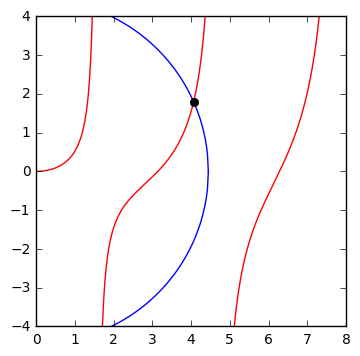

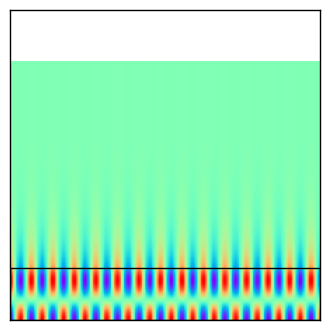

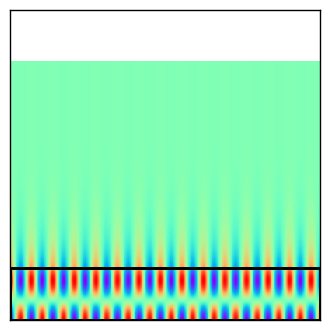

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in sqrt
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


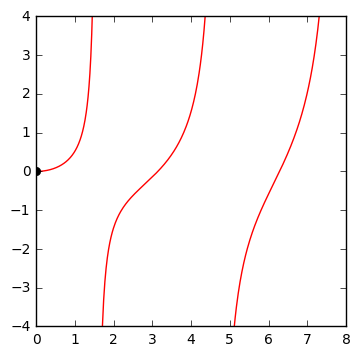

In [2]:

from scipy.optimize import fsolve

def DielSlab_TM_V(eps_r0, eps_r1, freq, d):
    k0 = 2.0*np.pi*freq/constants.c*sqrt(eps_r0)
    k1 = 2.0*np.pi*freq/constants.c*sqrt(eps_r1)
    V = np.sqrt(k1**2 - k0**2)*d
    return V
    

def DielSlab_TM_solveX(eps_r0, eps_r1, freq, d):
    V = DielSlab_TM_V(eps_r0, eps_r1, freq, d)
    f = lambda X: eps_r0/eps_r1*X*np.tan(X) - np.sqrt(V**2 - X**2)
    
    n_tan = int((V-np.pi/2.0)/np.pi)
    x0 = V - 0.001
    x_res = sp.optimize.fsolve(f, x0)
    #print(x0, V)
    return x_res
        

def DielSlab_TM_field_plot(eps_r0, eps_r1, freq, d, x_max, y_max, file_name=None, file_name_anim=None):
    k0 = 2.0*np.pi*freq/constants.c*sqrt(eps_r0)
    k1 = 2.0*np.pi*freq/constants.c*sqrt(eps_r1)

    X = DielSlab_TM_solveX(eps_r0, eps_r1, freq, d)
    p = X/d
    alpha = np.sqrt((k1**2 - k0**2) - p**2)
    p0 = 1j*alpha
    if np.imag(p0)>0:
        p0 *= -1
    B = C = np.exp(-1j*p0*d)/(2.0*np.cos(p*d))
    
    beta = np.sqrt(k0**2 + alpha**2)
    
    kx0, ky0 = beta, p0
    kx1, ky1 = beta, p
    
    pws = [{'xlim':[0, x_max], 'ylim':[0, d], 'E_kx_ky':[{'E':B, 'kx':kx1, 'ky':ky1}, {'E':C, 'kx':kx1, 'ky':-ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[d, y_max], 'E_kx_ky':[{'E':1.0, 'kx':kx0, 'ky':ky0}], 'Nx':400, 'Ny':200}]
    rectangles = [{'x0':0.0, 'y0':0.0, 'x1':x_max, 'y1':d, 'color':'k', 'fill':False}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    if file_name_anim!=None:
        savefig(file_name)
    show()
    
    if file_name_anim!=None:
        animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name_anim, fps=10, dpi=100)
        show()
    return

    
def DielSlab_TM_Plot_Graphical(eps_r0, eps_r1, freq, d, N=200, X_max=8, xylims=[[0, 8], [-4, 4]]):
    V = DielSlab_TM_V(eps_r0, eps_r1, freq, d)
    
    n_tan = int((X_max-np.pi/2.0)/np.pi)
    X = np.linspace(0.0, np.pi/2.0-1.0e-6, N)
    f_l = eps_r0/eps_r1*X*np.tan(X)
    plot(X, f_l, 'r')
    for i in range(n_tan):
        X = np.linspace(i*np.pi+np.pi/2.0+1.0e-6, (i+1)*np.pi+np.pi/2.0-1.0e-6, N)
        f_l = eps_r0/eps_r1*X*np.tan(X)
        plot(X, f_l, 'r')
    X = np.linspace(0.0, V, N)
    f_r = np.sqrt(V**2 - X**2)
    plot(X, f_r, 'b')
    plot(X, -f_r, 'b')
    xlim(xylims[0])
    ylim(xylims[1])
    
    x_res = DielSlab_TM_solveX(eps_r0, eps_r1, freq, d)
    y_res = eps_r0/eps_r1*x_res*np.tan(x_res)
    if y_res>=0.0:
        plot(x_res, y_res, 'ok')
    
    return


def DielSlab_TM_Animate_Graphical(eps_r0, eps_r1, freq, d, N=200, X_max=8, xylims=[0, 8, -4, 4],
                        file_name=None, fps=10, dpi=100):

    def animate_graph(i):
        plt.clf()
        DielSlab_TM_Plot_Graphical(eps_r0, eps_r1, freq[i], d, N=N, X_max=X_max, xylims=xylims)
        
    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_graph, frames=len(freq), interval=1, repeat=True)
    if file_name!=None:
        anim.save(file_name+'.gif', writer="imagemagick", fps=fps, dpi=dpi)
    return anim


do_dielec_slab=True

if do_dielec_slab:
    eps_r0, eps_r1 = 1.0, 3.0
    freq = 15.0*constants.giga
    d = 0.01

    file_name = os.path.join(dir_name, 'slab-TM-graph'+file_ext)
    savefig(file_name)
    DielSlab_TM_Plot_Graphical(eps_r0, eps_r1, freq, d, N=200)
    show()

    file_name = os.path.join(dir_name, 'slab-TM-field'+file_ext)
    file_name_anim = os.path.join(dir_name, 'slab-TM-field')
    DielSlab_TM_field_plot(eps_r0, eps_r1, freq, d, x_max=25.0*d, y_max=5.0*d, \
                           file_name=file_name, file_name_anim=file_name_anim)
    show()

    freq = np.linspace(0.0, 25.0*constants.giga, 100)
    file_name = os.path.join(dir_name, 'slab-TM-graph')
    DielSlab_TM_Animate_Graphical(eps_r0, eps_r1, freq, d, N=200, X_max=8, xylims=[[0, 8],[-4, 4]],\
                            file_name=file_name, fps=10, dpi=100)
    show()



### Surface waves

In [151]:

do_surface_waves = False
if do_surface_waves:
    ##------------
    k0 = 2.0*np.pi*2.0+0.0j
    n1, n2 = 1.25, 1.0
    

    k1, k2 = n1*k0, n2*k0

    kx1 = k1*1.5
    ky1 = np.sqrt(k1**2 - kx1**2)
    if np.imag(ky1)<0.0:
        ky1 *= -1.0
    kx2 = kx1
    ky2 = np.sqrt(k2**2 - kx2**2)
    if np.imag(ky2)>0.0:
        ky2 *= -1.0
    #print('ky2: ', ky2)
    
    
    x_max, y_max = 1.0, 0.2
    
    pws = [{'xlim':[0, x_max], 'ylim':[-y_max, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[0, +y_max], 'E_kx_ky':[{'E':1.0, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = [{'x0':0.0, 'y0':0.0, 'x1':x_max, 'y1':0.0, 'color':'k', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'surface-wave'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'surface-wave')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()

do_plasmon = False 
if do_plasmon:
    ##------------
    k0 = 2.0*np.pi*2.0+0.0j
    n1, n2 = 1.25, 1.0
    

    k1, k2 = n1*k0, n2*k0

    kx1 = k1*1.5
    ky1 = np.sqrt(k1**2 - kx1**2)
    if np.imag(ky1)<0.0:
        ky1 *= -1.0
    kx2 = kx1
    ky2 = np.sqrt(k2**2 - kx2**2)
    if np.imag(ky2)>0.0:
        ky2 *= -1.0
    #print('ky2: ', ky2)
    
    kx1 *= (1.0-0.15j)
    kx2 *= (1.0-0.15j)
    ky1 *= (1.0-0.15j)
    ky2 *= (1.0-0.15j)

    
    x_max, y_max = 1.0, 0.2
    pws = [{'xlim':[0, x_max], 'ylim':[-y_max, 0], 'E_kx_ky':[{'E':1.0, 'kx':kx1, 'ky':ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[0, +y_max], 'E_kx_ky':[{'E':1.0, 'kx':kx2, 'ky':ky2}], 'Nx':400, 'Ny':200}]
    rectangles = [{'x0':0.0, 'y0':0.0, 'x1':x_max, 'y1':0.0, 'color':'k', 'fill':True}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    file_name = os.path.join(dir_name, 'surface-plasmon'+file_ext)
    savefig(file_name)
    show()

    file_name = os.path.join(dir_name, 'surface-plasmon')
    animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name, fps=10, dpi=100)
    show()



### Polariation

In [17]:

def AnimatePolarization(E_x, E_y, N_phase=12,
                        file_name=None, fps=10, dpi=100, xylims=[[-1.5, 1.5], [-1.5, 1.5]]):

    def animate_pol(i):
        plt.clf()
        ax = plt.gca()
        phi_i = float(i)*2.0*np.pi/N_phase
        E_x_r = np.real(E_x*np.exp(1j*phi_i))
        E_y_r = np.real(E_y*np.exp(1j*phi_i))
        #plot(E_x_r, E_y_r, 'ok')
        ax.arrow(0.0, 0.0, E_x_r, E_y_r, head_width=0.05, head_length=0.1, fc='k', ec='k')

        xlim(xylims[0])
        ylim(xylims[1])

        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)

        
    fig = plt.figure()
    anim = animation.FuncAnimation(fig, animate_pol, frames=N_phase, interval=1, repeat=True)
    if file_name!=None:
        anim.save(file_name+'.gif', writer="imagemagick", fps=fps, dpi=dpi)
    return anim

do_polarization = False
if do_polarization:
    E_x, E_y = 1.0, 1.0
    file_name = os.path.join(dir_name, 'pol_linear')
    AnimatePolarization(E_x, E_y, file_name=file_name, N_phase=20)
    show()

    E_x, E_y = 1.0, 1.0j
    file_name = os.path.join(dir_name, 'pol_circular-lhp')
    AnimatePolarization(E_x, E_y, file_name=file_name, N_phase=20)
    show()

    E_x, E_y = 1.0, -1.0j
    file_name = os.path.join(dir_name, 'pol_circular-rhp')
    AnimatePolarization(E_x, E_y, file_name=file_name, N_phase=20)
    show()

    E_x, E_y = 1.0, -0.5j
    file_name = os.path.join(dir_name, 'pol_elliptic')
    AnimatePolarization(E_x, E_y, file_name=file_name, N_phase=20)
    show()




### couple waveguides

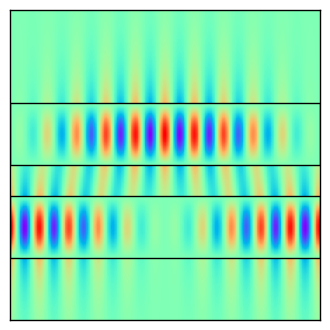

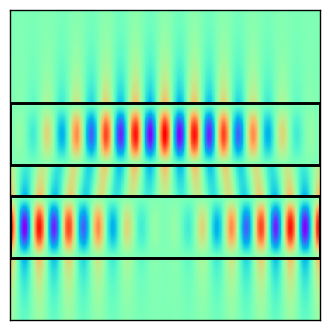

In [28]:
def CoupledGuide_field_plot(file_name=None, file_name_anim=None):
    l_g = 1.0
    d = l_g/2.0
    d_12 = d/2
    x_max = 10.0*l_g    
    y_max = 2.5*l_g
    kx = 2.0*np.pi/l_g
    ky1 = np.pi/d
    ky0 = -0.5j*kx
    y0 = d
    y1 = 2*d+d_12
    y0_c = y0+d/2.0
    y1_c = y1+d/2.0
    A = np.exp(1j*ky1*y0_c)
    B = np.exp(1j*ky1*y1_c)
    
    C_asym = 0.5
    C_sym = 0.5
    dkx = 0.1*kx
    
    pws = [{'xlim':[0, x_max], 'ylim':[y0, y0+d], 'E_kx_ky':[{'E':C_sym*A, 'kx':kx, 'ky':ky1}, {'E':C_sym*np.conjugate(A), 'kx':kx, 'ky':-ky1}, {'E':C_asym*A, 'kx':kx+dkx, 'ky':ky1}, {'E':C_asym*np.conjugate(A), 'kx':kx+dkx, 'ky':-ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[y0+d, y1], 'E_kx_ky':[{'E':C_sym*np.exp(1j*ky0*(y0+d)), 'kx':kx, 'ky':ky0}, {'E':C_sym*np.exp(-1j*ky0*y1), 'kx':kx, 'ky':np.conjugate(ky0)}, {'E':C_asym*np.exp(1j*ky0*(y0+d)), 'kx':kx+dkx, 'ky':ky0}, {'E':-C_asym*np.exp(-1j*ky0*y1), 'kx':kx+dkx, 'ky':np.conjugate(ky0)}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[0, y0], 'E_kx_ky':[{'E':C_sym*np.exp(-1j*ky0*y0), 'kx':kx, 'ky':np.conjugate(ky0)}, {'E':C_asym*np.exp(-1j*ky0*y0), 'kx':kx+dkx, 'ky':np.conjugate(ky0)}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[y1, y1+d], 'E_kx_ky':[{'E':C_sym*B, 'kx':kx, 'ky':ky1}, {'E':C_sym*np.conjugate(B), 'kx':kx, 'ky':-ky1}, {'E':-C_asym*B, 'kx':kx+dkx, 'ky':ky1}, {'E':-C_asym*np.conjugate(B), 'kx':kx+dkx, 'ky':-ky1}], 'Nx':400, 'Ny':200},
           {'xlim':[0, x_max], 'ylim':[y1+d, y_max], 'E_kx_ky':[{'E':C_sym*np.exp(1j*ky0*(y1+d)), 'kx':kx, 'ky':ky0}, {'E':-C_asym*np.exp(1j*ky0*(y1+d)), 'kx':kx+dkx, 'ky':ky0}], 'Nx':400, 'Ny':200}]
    rectangles = [{'x0':0.0, 'y0':y0, 'x1':x_max, 'y1':y0+d, 'color':'k', 'fill':False},
                  {'x0':0.0, 'y0':y1, 'x1':x_max, 'y1':y1+d, 'color':'k', 'fill':False}]
    plotPlaneWaves2D(pws, rectangles=rectangles)
    if file_name_anim!=None:
        savefig(file_name)
    show()
    
    if file_name_anim!=None:
        animatePlaneWaves2D(pws, rectangles=rectangles, N_phase=12, file_name=file_name_anim, fps=10, dpi=100)
        show()
    return

file_name = os.path.join(dir_name, 'coupl-guide'+file_ext)
file_name_anim = os.path.join(dir_name, 'coupl-guide-anim')

CoupledGuide_field_plot(file_name=file_name, file_name_anim=file_name_anim)
show()
